---
title: Epidemiology Models
format:
    html: default
    ipynb: default
---



H.W. Heathcote: epidemiologic models are *deterministic models for infectious diseases which are spread by direct person-to-person contact in a population*.

This kind of models has been used since by a few decades by economist, for matters that have nothing to do with health.

- diffusion of information, or opinions on social medias
- asset prices and fads
- expectation formation for macroeconomic outcomes (ex: *The Epidemiology of Macroeconomic Expectations* by Chris Carroll)

Epidemiologic models have two features that depart from standard economic models:

- Agent's behaviour does not take the full system into account, an is irrational in the sense that it isn't forward looking. Instead, an agent is given a behavioural heuristic.
- The transitions of the whole system can be determined without solving for complex interactions first.

Understanding why these two assumptions are very costly for economists will keep us busy during a big part of the course. Here we just consider two simple models as small programming exercises.

### Simple SIR model

There is a continuum of agents of mass $1$. Each agent can be either "Susceptible" (S), "Infected" (I) or "Recovered" (R).
In each period, one agent meets another agent drawn randomly.
During a meeting Susceptible agents who meet an infected agent, will always catch the disease (or the fad) but are not contagious. Infected agents, have a probability $\pi$ of being recovered. Nothing happens to Recovered agents who meet other people. No distinction is made between recovering as a healthy or a dead person.

We're interested in the evolution in the number infected persons, both the speed of infection and the total amount of infected people in every period.

__Write down the transition equations for $n_I$, the number of infected people, for $n_R$ the number of recovered people and $n_S$ the number of susceptible people.__



Here are the transitions :

- $n_{S,t} = n_{S,t-1} (1-n_{I,t-1})$
- $n_{I,t} = n_{S,t-1} n_{I,t} + n_{I,t-1} (1-\pi)$
- $n_{R,t} = n_{I,t-1} \pi + n_{R,t-1}$



__Compute the transition function `f` for the vector state $s_t$ returning $s_{t+1}$.__

In [8]:
"Compute new state from old state `s`"
function f(s::Vector{Float64}; π=0.1)::Vector{Float64}
    
    # comments
    n_S, n_I, n_R = s
    # equivalent to 
    # n_S = s[1]
    # n_I = s[2]
    # n_R = s[3]

    N_S = n_S*(1-n_I)
    N_I = n_S*n_I + n_I*(1-π)
    N_R = n_I*π + n_R

    return [N_S, N_I, N_R]

end

f

In [9]:
v = f([0.2, 0.5, 0.3])

3-element Vector{Float64}:
 0.1
 0.55
 0.35

In [10]:
# check that vector v sums to 1
v[1] + v[2] + v[3] == 1.0

true

In [11]:
sum(v) == 1.0

true

In [12]:
# two kinds of optional arguments:

# named arguments separated by semi-colon
# like python
function fun(a,b ; pi=3.14, beta=0.96)
    nothing
end

# optional argument
function gun(a,b,pi=3)
end

# equivalent to
function gun(a,b)
end
function gun(a,b,pi)(1-n_I)
end


### MESSAGE

# use semi-colon for named arguments

ErrorException: syntax: "(1 - n_I)" is not a valid function argument name around /home/pablo/Teaching/polytechnique/eco309_past/pushups/1_epidemiology.ipynb:16

__Compute the transitions over $T$ periods. Plot the result using Plots.jl. (bonus: check against closed form solution)__



In [13]:
function simulate(s0; π=0.1, T=20)

    simul = [s0]

    for i ∈ 1:T  # \in you can also use `in` or `=`
        s = simul[end]
        s1 = f(s; π=π)
        push!(simul, s1)
    end

    return simul

end

simulate (generic function with 1 method)

In [14]:
using Plots

In [22]:
s0 = [0.9, 0.1, 0.0]
sim = simulate(s0)

21-element Vector{Vector{Float64}}:
 [0.9, 0.1, 0.0]
 [0.81, 0.18000000000000002, 0.010000000000000002]
 [0.6642, 0.3078000000000001, 0.028000000000000004]
 [0.45975923999999996, 0.48146076000000015, 0.05878000000000001]
 [0.23840320689257752, 0.6546707171074226, 0.10692607600000004]
 [0.08232760847550455, 0.7452792438137533, 0.17239314771074232]
 [0.02097055068588577, 0.7321083772219967, 0.24692107209211767]
 [0.005617834853790308, 0.6742502553318925, 0.32013190981431733]
 [0.0018300082692097876, 0.6106130563832839, 0.38755693534750657]
 [0.0007125813267409158, 0.5506691776874244, 0.44861824098583497]
 ⋮
 [8.931225220166544e-5, 0.40197066326707453, 0.5979400244807241]
 [5.341134694628574e-5, 0.3618094978456225, 0.6381370908074316]
 [3.408661432839177e-5, 0.32564787279367813, 0.6743180405919939]
 [2.298638088161248e-5, 0.29309418574775714, 0.7068828278713617]
 [1.624920629382846e-5, 0.2637915043475692, 0.7361922464461375]
 [1.196280372112546e-5, 0.23741664031538498, 0.7625713968808944]

In [23]:
[e[1] for e in sim]; # vector of susceptible people

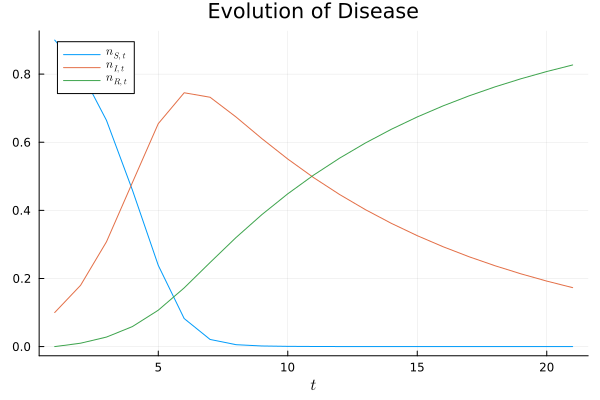

In [32]:
pl = plot([e[1] for e in sim]; title="Evolution of Disease", xlabel="\$t\$", label="\$n_{S,t}\$")
# "\$t\$" is needed because in "$t$" the dollar sign would be interpreted as interpolation command
plot!(pl, [e[2] for e in sim], label="\$n_{I,t}\$")
plot!(pl, [e[3] for e in sim], label="\$n_{R,t}\$")

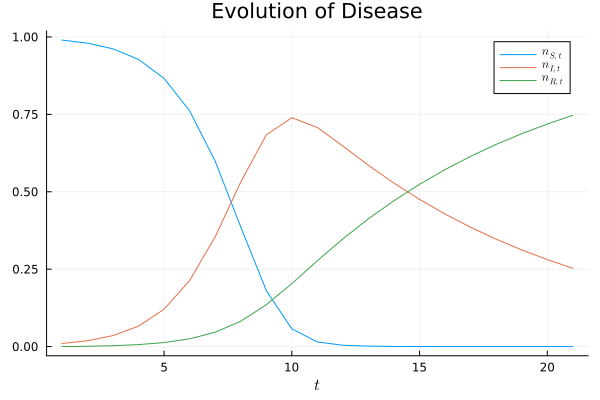

In [34]:
s0 = [0.99, 0.01, 0.0]
sim1 = simulate(s0;)
pl = plot([e[1] for e in sim1]; title="Evolution of Disease", xlabel="\$t\$", label="\$n_{S,t}\$")
# "\$t\$" is needed because in "$t$" the dollar sign would be interpreted as interpolation command
plot!(pl, [e[2] for e in sim1], label="\$n_{I,t}\$")
plot!(pl, [e[3] for e in sim1], label="\$n_{R,t}\$")

__We now assume a Susceptible person who meets an infected one has a probability $\mu$ of catching the disease. Update the transition function $f$ and write a function `simulate`  of $\mu$, $\pi$ which returns the simulation. Compare different values of the parameters. How would you interpret "social distancing"? How would you choose parameters $\Pi$ and $\mu$__ 

In [35]:
"Compute new state from old state `s`"
function f(s::Vector{Float64}; π=0.1, μ=1.0)::Vector{Float64}
    
    # comments
    n_S, n_I, n_R = s
    # equivalent to 
    # n_S = s[1]
    # n_I = s[2]
    # n_R = s[3]

    N_S = n_S - n_S*n_I*μ
    N_I = n_S*n_I*μ + n_I*(1-π)
    N_R = n_I*π + n_R

    return [N_S, N_I, N_R]

end

f

In [38]:
function simulate(s0; π=0.1, T=20, μ=1.0)

    simul = [s0]

    for i ∈ 1:T  # \in you can also use `in` or `=`
        s = simul[end]
        s1 = f(s; π=π, μ=μ)
        push!(simul, s1)
    end

    return simul

end

simulate (generic function with 1 method)

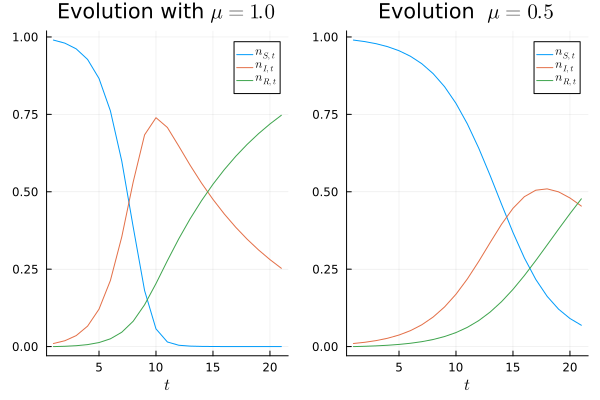

In [43]:
s0 = [0.99, 0.01, 0.0]
sim0 = simulate(s0;)
pl0 = plot([e[1] for e in sim0]; title="Evolution with \$\\mu=1.0\$", xlabel="\$t\$", label="\$n_{S,t}\$")
# "\$t\$" is needed because in "$t$" the dollar sign would be interpreted as interpolation command
plot!(pl0, [e[2] for e in sim0], label="\$n_{I,t}\$")
plot!(pl0, [e[3] for e in sim0], label="\$n_{R,t}\$")

s0 = [0.99, 0.01, 0.0]
sim1 = simulate(s0; μ=0.5)
pl1 = plot([e[1] for e in sim1]; title="Evolution  \$\\mu=0.5\$", xlabel="\$t\$", label="\$n_{S,t}\$")
# "\$t\$" is needed because in "$t$" the dollar sign would be interpreted as interpolation command
plot!(pl1, [e[2] for e in sim1], label="\$n_{I,t}\$")
plot!(pl1, [e[3] for e in sim1], label="\$n_{R,t}\$")

plot(pl0, pl1)

### A Spatial SIR model

We now consider another version of the model where agents evolve in the space $\mathcal{S}=[0,1]\times[0,1]$. There are $N\in\mathbb{N}$ agent. At any date, each agent $n \in [0,1]$  is located at $(x_n,y_n)\in \mathcal{S}$.

Each agent moves follows a random walk bounded by $\mathcal{S}$:
$$x_t = \min(\max( x_{t-1} + \epsilon_t, 0), 1)$$
$$y_t = \min(\max( y_{t-1} + \eta_t, 0), 1)$$
where $\epsilon_t$ and $\eta_t$ are both normally distributed with standard deviation $\sigma$.

At any date, the individual state of an agent is $s_t=(x_t, y_t, h_t)$ where $h_t$ is either "S", "I" or "R". $v_t$ denotes the states of all agents (for instance $v_t=(s_{n,t})_n$. The health status of each agent is updated in the following way:

- Agents $R$ stay $R$.
- Agents $I$ have probability $\pi$ to become $R$. They stay $I$ otherwise.
- An agent of type $S$ in position $(x,y)$ has a probability $prob(x,y,S)$ to be infected that is $\mu$ if there is another infected agent within a radius $r>0$.


__Define a type `Agent`, which holds the type of an agent. The state of the whole system will be held in a `Vector[Agent]` type.__



__Write a function `spatial_transition(S::Vector{Agent})::Vector{Agent}` to compute the transition of the positions. Write another function `random_guess(T=100)` which simulates for $T$ periods in order to find a good initial guess.__



__Write a function `show_population` to plot all agents with different colors for different health status.__



__Write a function `evolve(S::Vector[Agent])::Vector[Agent]` which takes the population in a given state and returns the same population with updated health status.__



__Write a function `simulate(S0::Vector[Agent], k=1)` to simulate the economy starting from an initially random position with `k` infected individuals. The returned object should be of type `Vector[Vector[Agent]]`.__



__Compute statistics along a simulated path for $n_I$, $n_S$, $n_R$. Plot and compare with the basic SIR model__

### Additional questions

Have fun by trying to answer one of these questions:

- change probability of infection so that it depends on the number of infected people in the vincinity (with some suitable functional formulation for)
- compute an animation of the transition
- compute an interactive visualisation (with `Interact.jl` if available)